# Modul Grundlagen DataScience - HTW Berlin


# Datenmanipulation und -visualisierung mit python


In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from matplotlib import gridspec
import os
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### Einzelne Tabellen erzeugen

In [2]:
data = pd.read_csv('./Zweitstimme_2017_2013.csv', sep=';')
g = data.groupby('Wahlkreis')

Erzeugung von den notwendigen Ordnern:

In [3]:
if not os.path.exists("./datascience_project"):
    os.makedirs("./datascience_project")
current_dir = "./datascience_project"
if not os.path.exists(current_dir + "/DF_Wahlkreis"):
    os.makedirs(current_dir + "/DF_Wahlkreis")
if not os.path.exists(current_dir + "/DF_Wahlkreis/tabellen"):
    os.makedirs(current_dir + "/DF_Wahlkreis/tabellen")
if not os.path.exists(current_dir+"/DF_Wahlkreis/bilder"):
    os.makedirs(current_dir+"/DF_Wahlkreis/bilder")
if not os.path.exists(current_dir+"/DF_Wahlkreis/bilder/200dpi"):
    os.makedirs(current_dir+"/DF_Wahlkreis/bilder/200dpi")
    

toNumber ist eine Methode, die - anhand des als Parameter übergebenen Wahlkreisnamens - die entsprechende Wahlkreisnummer zurückliefert. Die Funktion wird bei der Speicherung der Bilder verwendet.

In [4]:
def toNumber(wahlkreisname):
    if(wahlkreisname == 'Mitte'):
        return '75';
    elif(wahlkreisname == 'Pankow'):
        return '76';
    elif(wahlkreisname == 'Reinickendorf'):
        return '77';
    elif(wahlkreisname == 'Spandau-Charlottenburg-Nord'):
        return '78';
    elif(wahlkreisname == 'Steglitz-Zehlendorf'):
        return '79';
    elif(wahlkreisname == 'Charlottenburg-Wilmersdorf'):
        return '80';
    elif(wahlkreisname == 'Tempelhof-Schoeneberg'):
        return '81';
    elif(wahlkreisname == 'Neukoelln'):
        return '82';
    elif(wahlkreisname == 'Friedrichshain-Kreuzberg-Prenzlauer-Berg-Ost'):
        return '83';
    elif(wahlkreisname == 'Treptow-Koepenick'):
        return '84';
    elif(wahlkreisname == 'Marzahn-Hellersdorf'):
        return '85';
    elif(wahlkreisname == 'Lichtenberg'):
        return '86';

Die Methode autolabel wird verwendet, um die Percentage über die Balken zu schreiben. Diese Methode wird ähnlicherweise in den matplotlib-Tutorialsseiten vorgestellt.


In [5]:
import numpy as np
def autolabel(rects):
    for rect in rects:
      height = rect.get_height()
      plt.text(rect.get_x()+rect.get_width()/2., 1.05*height, '%s'%str(height),
                ha='center', va='bottom', fontsize=8) #%%

Hier erfolgt die Erzeugung der einzelnen Tabellen, anhand des Dataframes, der die verschiedenen Wahlkreise nach ihren Namen gruppiert hat. Es wird mittlerweile auch ein Array der Namen erzeugt, damit die Namen später als Diagrammtitel verwendet werden können.

In [6]:
#Dataframes werden erzeugt
listofdata = []
for Wahlkreis, Wahlkreis_df in g:
    data = Wahlkreis_df #speichert das Dataframe (Teiltabelle) in einer Variable
    listofdata.append(data)
    nummer=toNumber(str(Wahlkreis))
    name=str(Wahlkreis) #Erzeugt name fuer die einzelnen CSV-Dateien
    data.to_csv(current_dir+"/DF_Wahlkreis/tabellen/%s_%s.csv"%(nummer,name), sep=';', index=False) 

Die verschiedenen Pfade werden in einem Array gespeichert zur gezielten Addressierung:

In [7]:
standard_path = current_dir+"/DF_Wahlkreis/tabellen/"
path_arr = []
for files in next(os.walk(standard_path))[2]:
    path_arr.append(standard_path + ""+ files)

## Balkendiagramme erzeugen

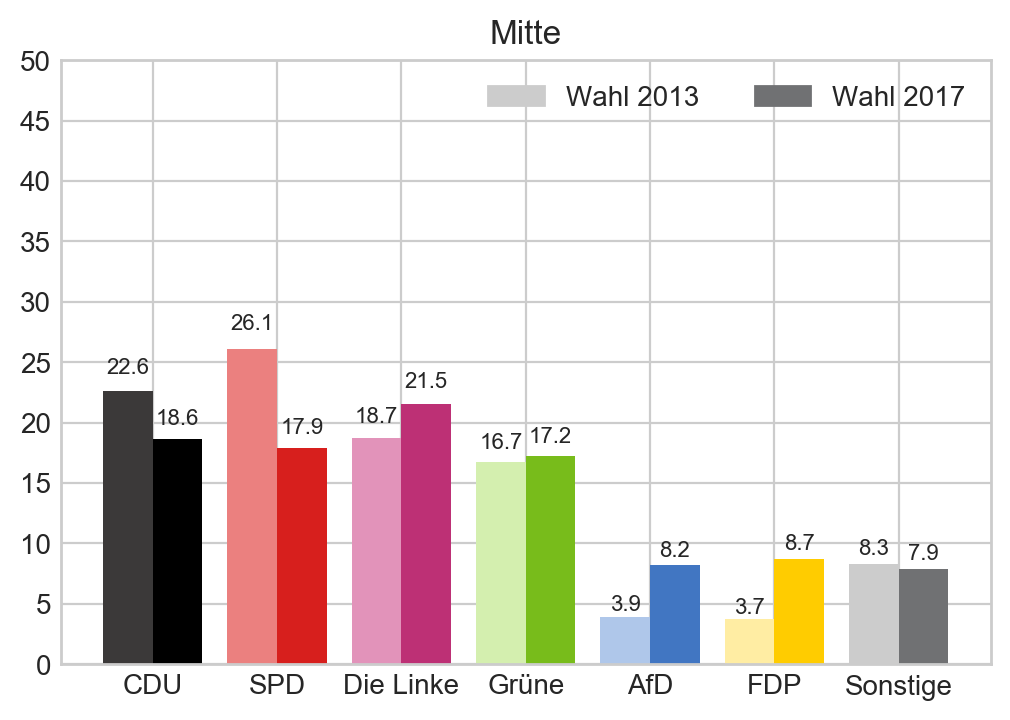

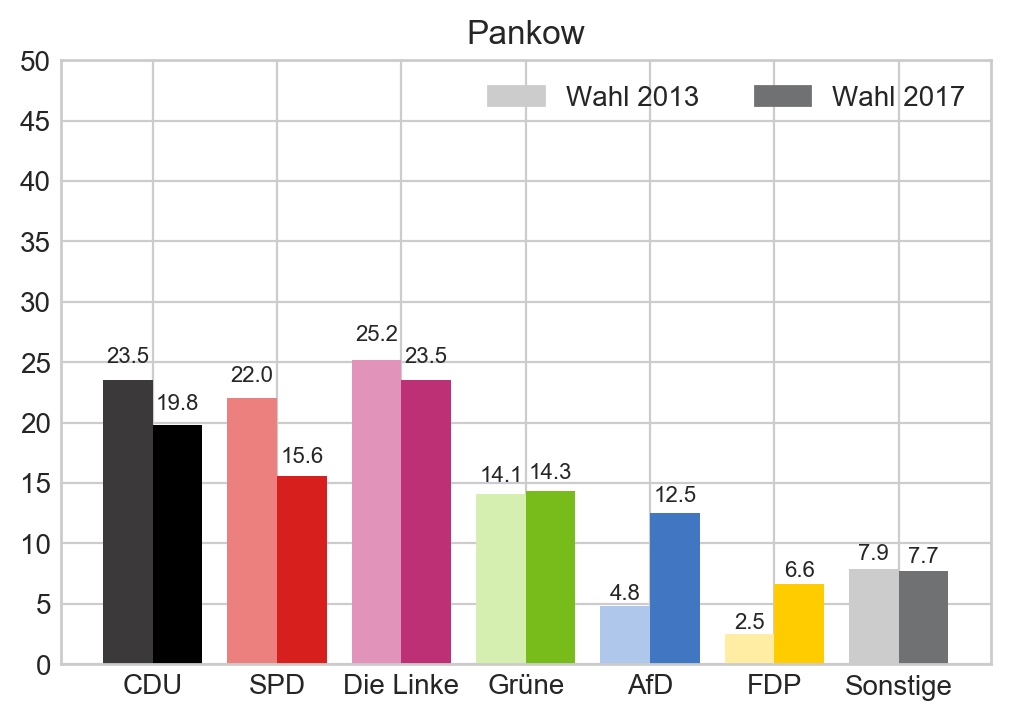

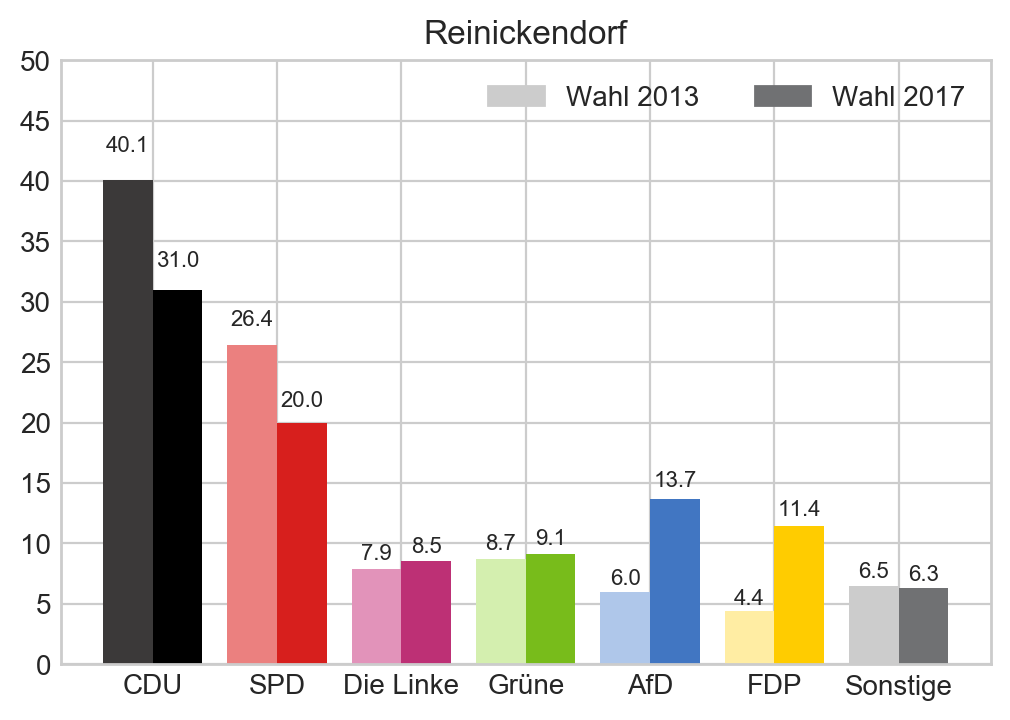

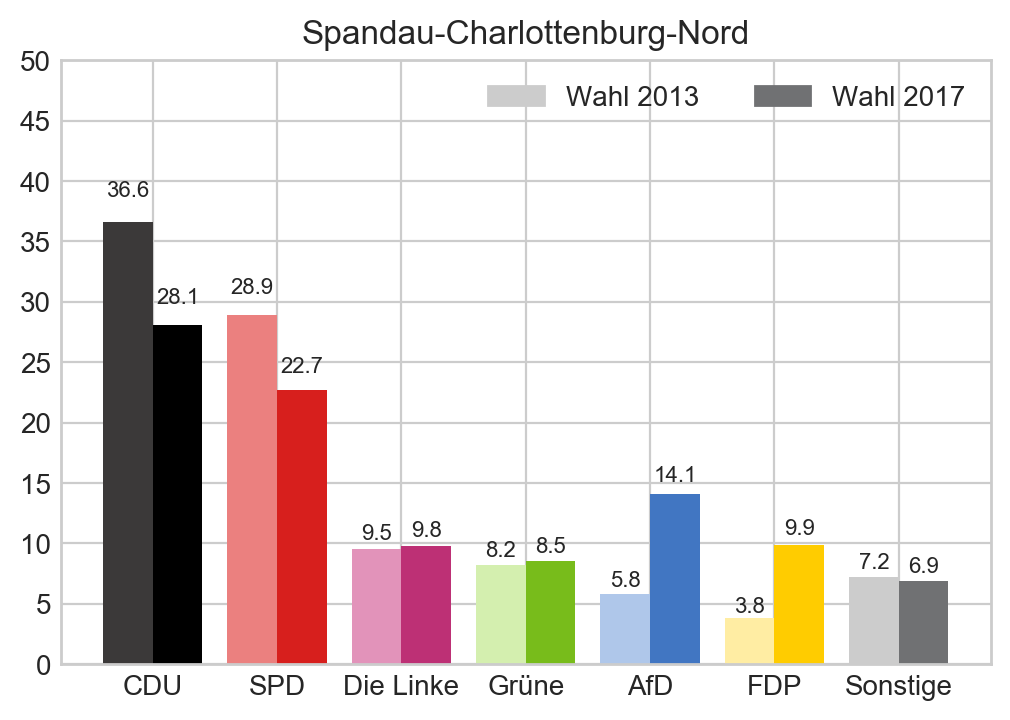

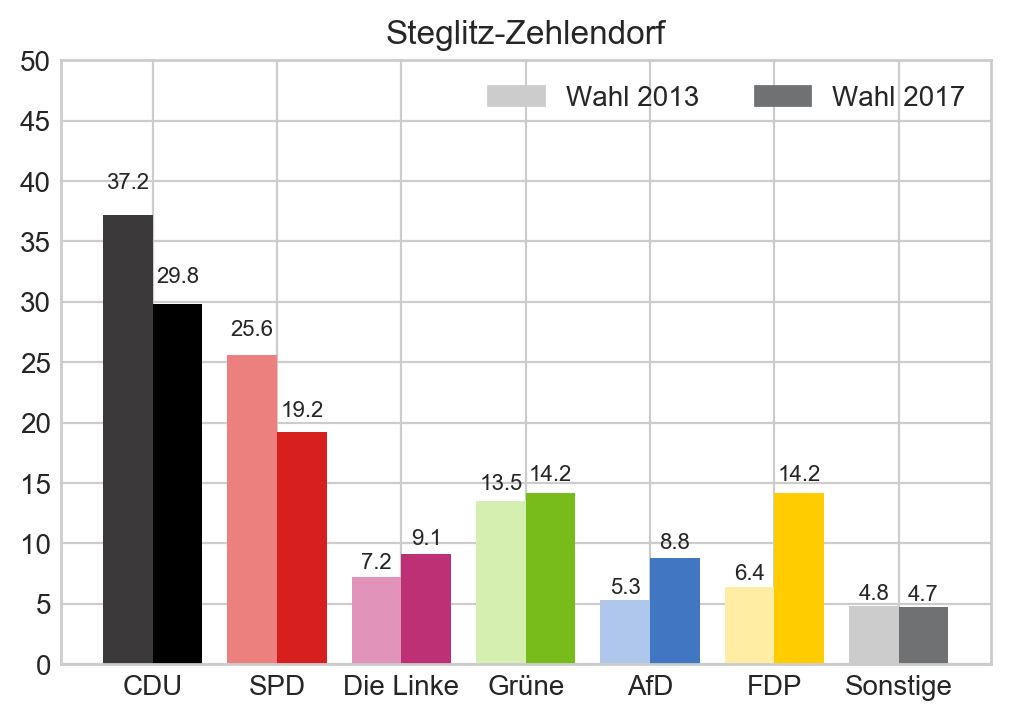

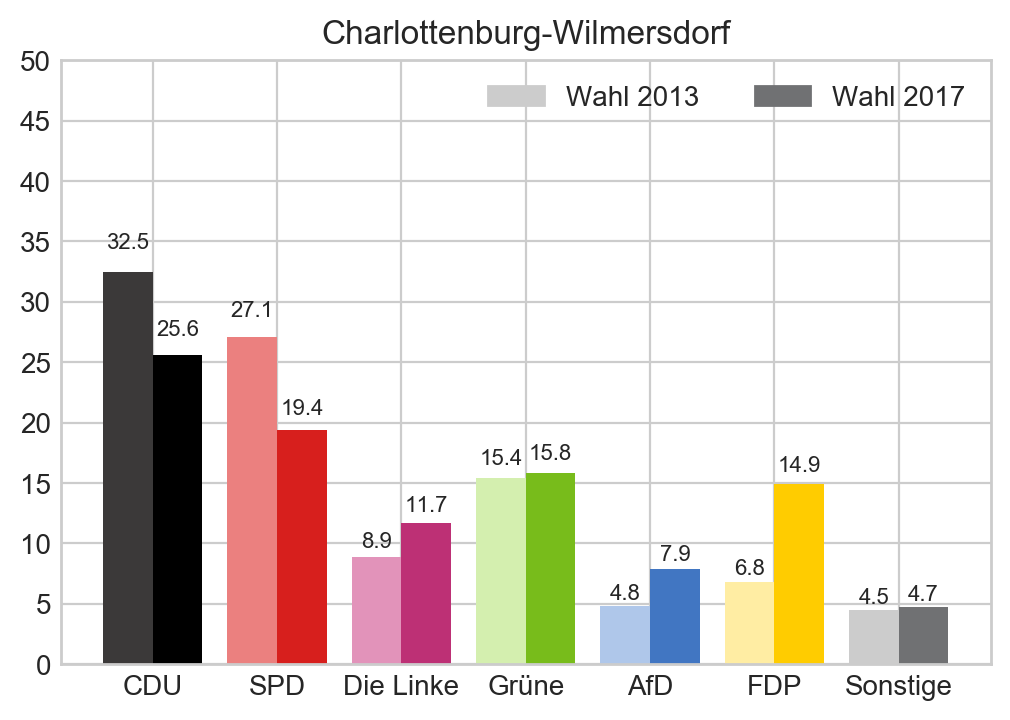

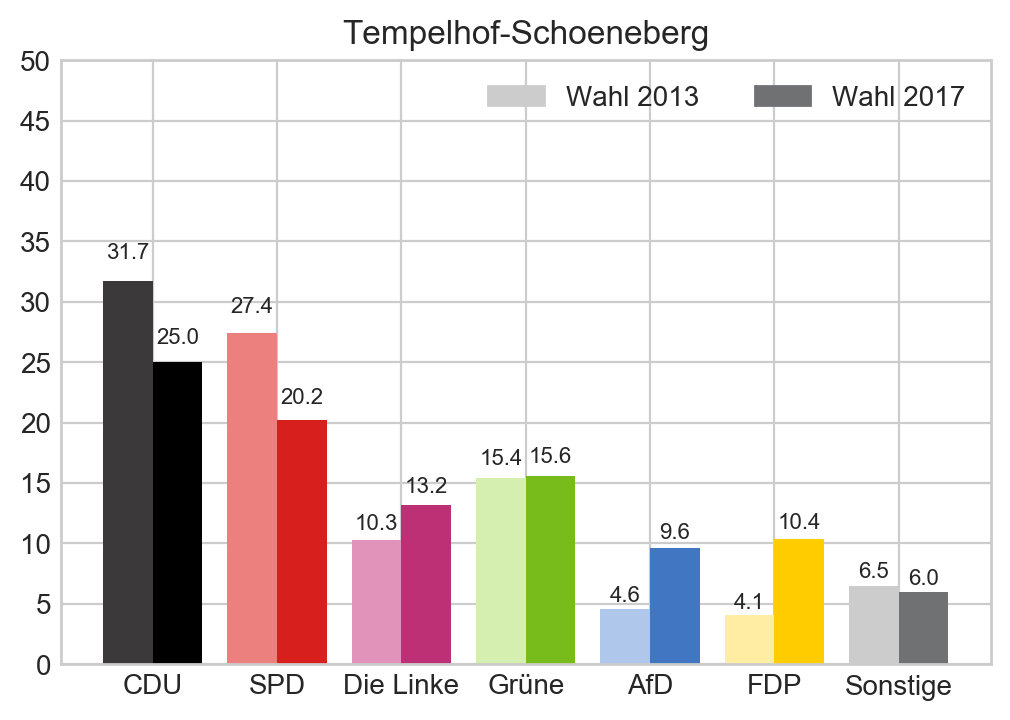

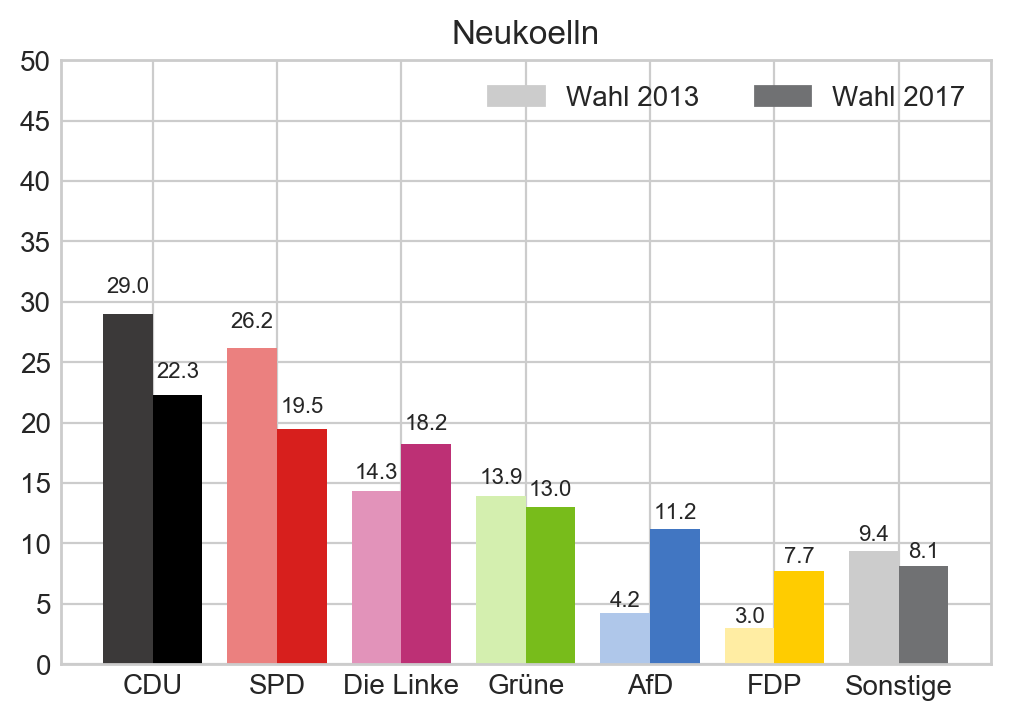

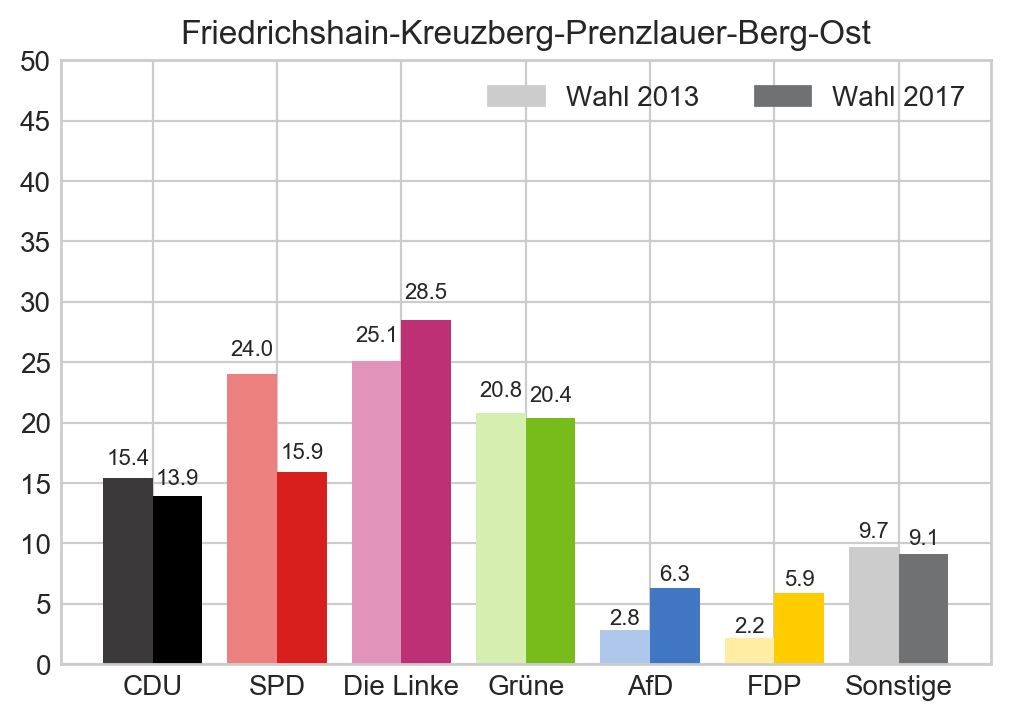

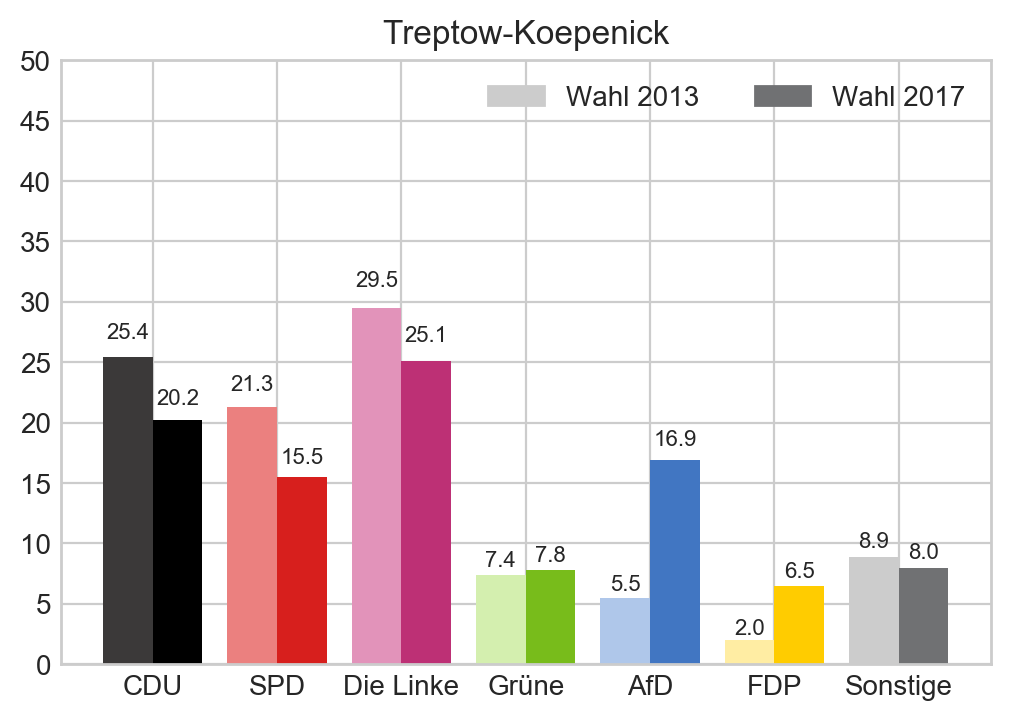

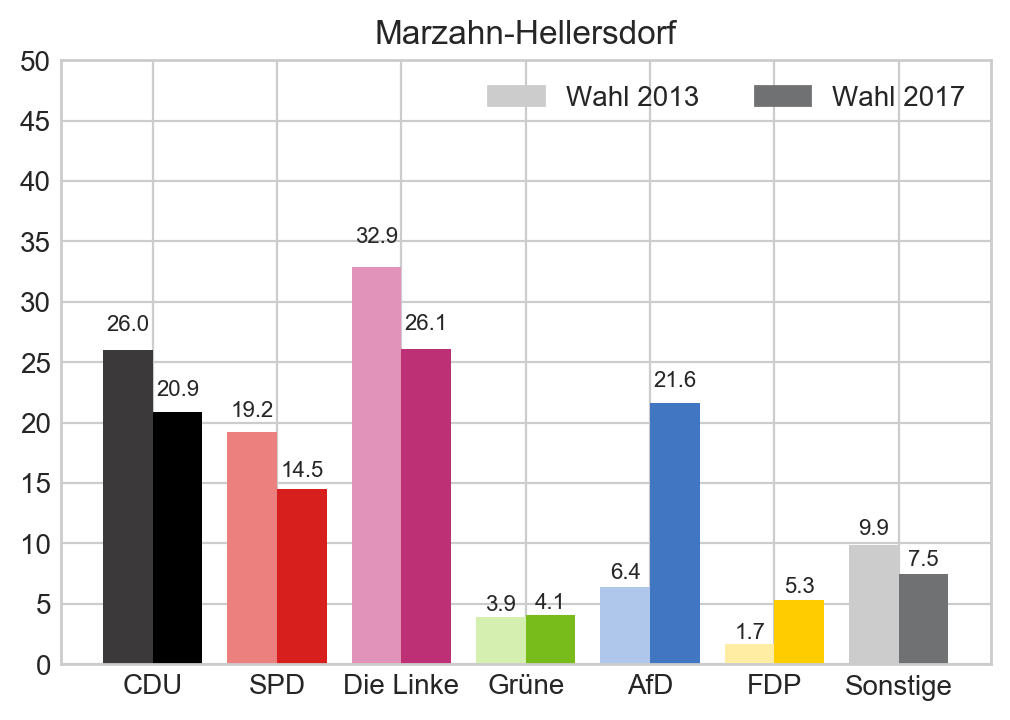

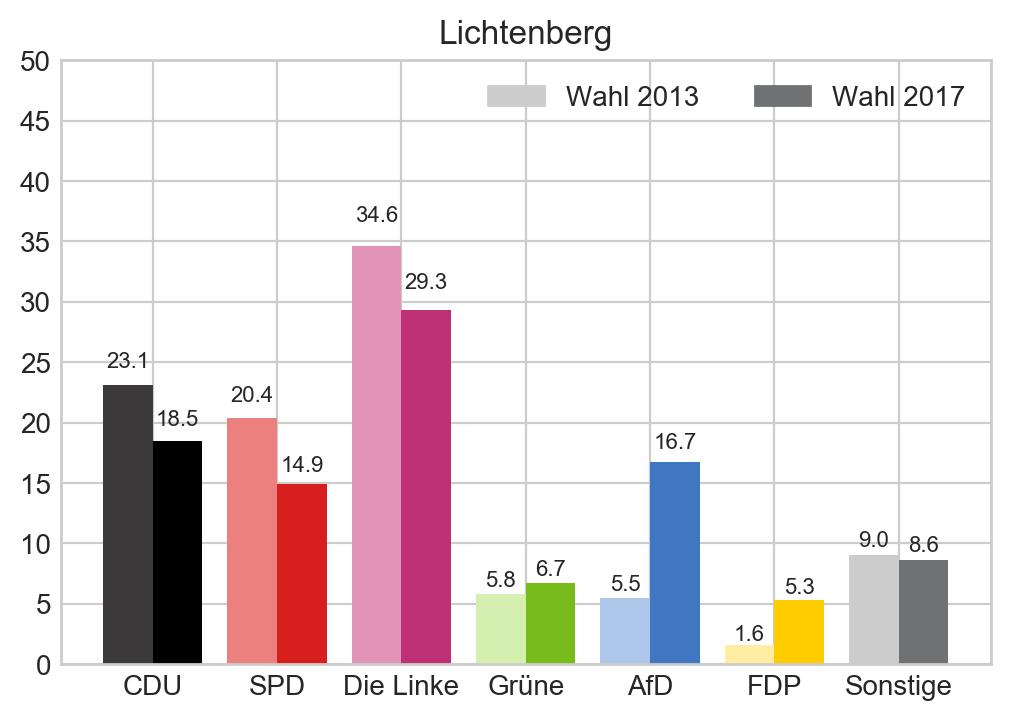

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.patches as mpatches
sns.set_style("whitegrid")

names=[]
#Einlesen der Dateien
files = os.listdir(current_dir+"/DF_Wahlkreis/tabellen")
#Array der Dateien erzeugen
csv_files = [file for file in files if file[-4:] == ".csv"]
#Array der Namen erzeugen
names = ["%s" %file[:-4] for file in files if file.endswith(".csv") ] #Bezirkname
labels = ["CDU", "SPD", "Die Linke", "Grüne", "AfD", "FDP", "Sonstige"] #Label für x-Achse
farben_2017 = ("000", "#d71f1d", "#bd3075", "#78bc1b", "#4176c2", "#ffcc00", "#707173")
farben_2013 = ("#3b3939", "#eb807f", "#e293ba", "#d4efaf", "#afc7ea", "#ffeda3", "#cccccc")

x = [1,2,3,4,5,6,7] #x-Werte() - "CDU", "SPD", "Die Linke", "Grüne", "AfD", "FDP", "Sonstige"
y1 = []
y2 = []
dict_2013 = {} #speichert bei jeder Iteration Partei:Ergebnis
dict_2017 = {} #speichert bei jeder Iteration Partei:Ergebnis

i=0
for file in csv_files:
    sub_df = pd.read_csv(current_dir+"/DF_Wahlkreis/tabellen/" + file, sep=";")
    for index, row in sub_df.iterrows():
        if index%2==0:
            dict_2017[row["Partei"]] = row['Ergebnis']
        else:
            dict_2013[row["Partei"]] = row["Ergebnis"]
        #Erzeuge y-Werte:
        y1_temp = list(dict_2017.values())
        #Umwandlung zu Float
        y1 = [float(i.replace(",",".")) for i in y1_temp]
        #Liste aus Werte von dict_2013
        y2_temp = list(dict_2013.values())
        #Umwandlung zu Float
        y2 = [float(i.replace(",",".")) for i in y2_temp]
        
 
    #Erzeuge Balkendiagramm
    fig,ax = plt.subplots()
    ax.set_ylim([0,50.001])
    ax.yaxis.set_ticks(np.arange(0,50.001, 5.0))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    #ax.plot(x,y3, color='#A0522D')
    rects1 = ax.bar(x, y2,label="Jahr 2013",tick_label=labels, color=farben_2013, width=-0.4, align="edge")
    autolabel(rects1)
    rects2 = ax.bar(x, y1, label="Jahr 2017",tick_label=labels, color=farben_2017, width=0.4, align="edge")
    autolabel(rects2)
    #Legende
    W2013 = mpatches.Patch(color="#cccccc", label="Wahl 2013")
    W2017 = mpatches.Patch(color="#707173", label="Wahl 2017")
    plt.legend(handles=[W2013,W2017], fancybox=True, framealpha=0.5, loc='best', ncol=2)
    tmp = names[i]
    #Titel
    ax.set_title(tmp[3:])
    labelsY1 = [ind1 for ind1 in y1]
    labelsY2 = [ind2 for ind2 in y2]
    
    #Speichern der Bilder
    #Kleinformat
    #fig.savefig(current_dir + "/DF_Wahlkreis/bilder/" + tmp[:2] + ".png", transparent=True)#Format: zahl.png
    fig.dpi = 200 
    #200 dpi-Format
    fig.savefig(current_dir + "/DF_Wahlkreis/bilder/200dpi/" + tmp[:2] + ".png", transparent=True)#Format: zahl.png   
    i=i+1
del(names[:])